# Zoo Animal Classification
### A database containing 18 attributes(15 of which are Boolean) in order to classify amongst 100 unique animals that are categorized into 7 Class Types including: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate. Acknowledgments:  UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo

In [1]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read in first dataset into pandas
df1 = pd.read_csv('zoo.csv')

In [3]:
#read in second dataset into pandas
df2 = pd.read_csv('class.csv')

In [4]:
#take a look at dataframe 1
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
#take a look at dataframe 2
df2

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [6]:
#view dataframe 1 column names
df1.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [7]:
#view dataframe 2 column names
df2.columns

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')

In [8]:
#take a look at shape
print(df1.shape)
print(df2.shape)

(101, 18)
(7, 4)


In [9]:
#take a look at properties of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
#take a look at properties of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 304.0+ bytes


In [11]:
#check for missing values in dataframe 1
df1.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [12]:
#check for missing values in datframe 2
df2.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [13]:
#rename column 'class_type' to be 'Class_Number' in order to merge
new_columns = df1.columns.values
new_columns[17] = 'Class_Number'
df1.columns = new_columns

In [14]:
#recheck df1 column names
df1.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'Class_Number'],
      dtype='object')

In [15]:
#merge both datasets on common column
df = pd.merge(df1, df2, on='Class_Number')
df[0:50]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,venomous,fins,legs,tail,domestic,catsize,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bear,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
3,boar,1,0,0,1,0,0,1,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,buffalo,1,0,0,1,0,0,0,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
5,calf,1,0,0,1,0,0,0,1,1,...,0,0,4,1,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
6,cavy,1,0,0,1,0,0,0,1,1,...,0,0,4,0,1,0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
7,cheetah,1,0,0,1,0,0,1,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
8,deer,1,0,0,1,0,0,0,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
9,dolphin,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [16]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'Class_Number',
       'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names'],
      dtype='object')

In [17]:
#check if row labels correspond to index labels on this data set
df.iloc[[0,100]]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,venomous,fins,legs,tail,domestic,catsize,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
100,tuatara,0,0,1,0,0,0,1,1,1,...,0,0,4,1,0,0,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"


In [18]:
#take a look at animal_name column and sort out unique values to see if data is repeated
all_animal_names = df['animal_name'].unique()
np.sort(all_animal_names)
len(all_animal_names)

100

### There are 100 unique animal names out of 101. Frog is repeated twice since one frog is listed as venemous and the other frog is listed as not venemous. 

### Majority of animals fall in class number 1(mammals) which includes:ardvark, antelope, bear, and boar-just to name a few.

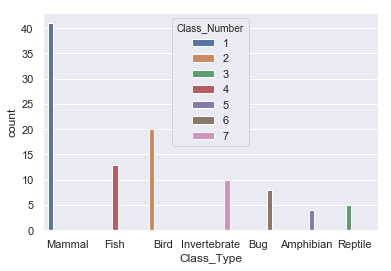

In [19]:
sns.countplot(x='Class_Type', data=df, hue='Class_Number')

### This second plot allows us to see which class_number are associated with which class_type of animal.

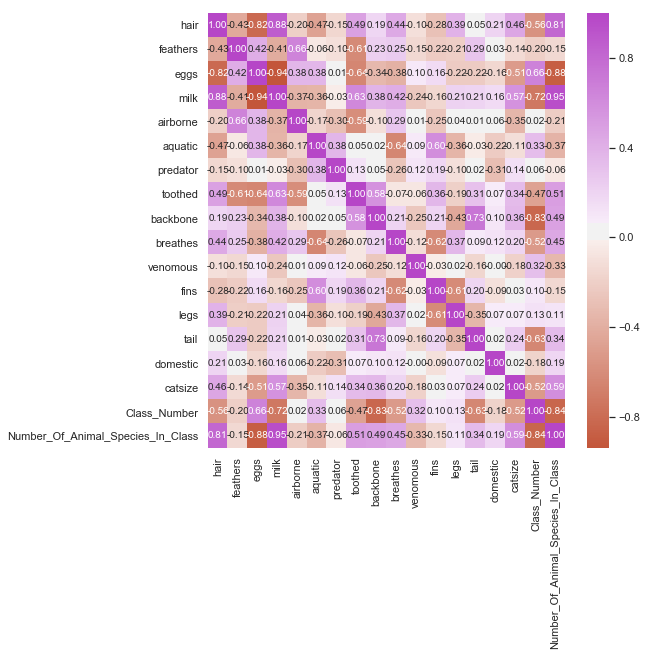

In [20]:
#look for correlations by plotting correlation heatmap
corr_plot = df.corr()
fig, ax = plt.subplots(figsize = (8,8))
colormap=sns.diverging_palette(20,300, as_cmap=True)
_ = sns.heatmap(corr_plot,cmap=colormap,annot=True,fmt=".2f", xticklabels=corr_plot.columns, yticklabels=corr_plot.columns)
plt.show()

### trends seen:1.)high correlation between teeth and backbone which is due to "Teeth being formed from neural tube, the embryonic tissue that becomes the brain and spinal cord.[2]"
### 2.) high correlation between aquatic and fins which, of course, makes sense.
### 3.)high correlation between tail and backbone which also makes sense
### 4.)low correlation between domestic animals and predators which also makes sense
### 5.)finally, there is high correlation between breathing and animals with hair and strong negative correlation between not breathing and fins

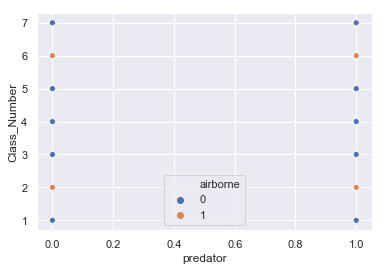

In [21]:
sns.scatterplot( x = 'predator',y = 'Class_Number', data = df, hue = 'airborne')

## This shows this majority of predators are not airborne

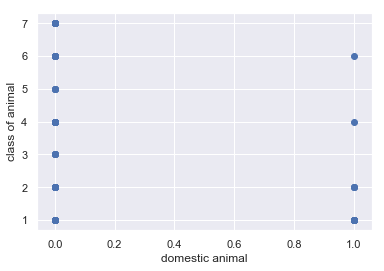

In [22]:
#plot which class of animals fall within the category of domestic
x_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
X_cols = df[x_cols]
y = df['Class_Number'].values
dom = X_cols['domestic'].values
plt.scatter(dom,y)
plt.xlabel('domestic animal')
plt.ylabel("class of animal")
plt.show()

## This shows that domestic animals fall in classes 1, 2, 4 and 6 which correspond to classes: mammals, birds, fish and bugs respectively.  

### This is a supervised machine learning classification problem since the response being predicted, animal, is categorical and its values are finite. Before, beginning sci-kit learn, the following requirements need to be met: 1.)features and response are separate objects 2.) features and response are numeric 3.)features and response are numpy arrays 4.)features and response have specific shapes.

In [23]:
#remove non-numeric columns
x_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
X = df[x_cols].as_matrix()
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(101, 16)


In [24]:
y = df['Class_Number'].values
print(type(y))
y.shape

<class 'numpy.ndarray'>


(101,)

In [25]:
#check if correct features were selected
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
dec_tre = DecisionTreeClassifier()
sel = SelectFromModel(dec_tre, threshold = 0.0005)
sel.fit(X_cols,y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        max_features=None, norm_order=1, prefit=False, threshold=0.0005)

In [26]:
#print out list of selected features from sklearn
sel.get_support(indices=True)
selected_feat=X_cols.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

9
Index(['feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'backbone', 'fins', 'legs'],
      dtype='object')


In [27]:
#split data into train and test set,create decision tree classifier object
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
#train decision tree classifier
dec_tre.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 16) (31, 16) (70,) (31,)


In [28]:
#predict the response for the test dataset and print decision tree model accuracy
from sklearn import metrics
y_pred = dec_tre.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8709677419354839


In [29]:
#perform cross- validation on decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
scores = cross_val_score(dec_tre, X, y, cv=4)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96428571 0.96       0.91666667 0.95833333]
Average cross-validation score: 0.95


## The test accuracy on decision tree model and cross-validation score respectively is 0.96 and 0.95

In [30]:
#view all hyperparameters utlized
from pprint import pprint
print('Hyperparameters currently in use:\n')
pprint(dec_tre.get_params())

Hyperparameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [31]:
#perform GridSearchCV to tune hyperparameters on decision tree model
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)
param_grid = {
    'random_state': [1,10,42],
    'max_depth': [1,10,100]}
dec_tre_cv = GridSearchCV(dec_tre,param_grid,cv=4)
dec_tre_cv.fit(X,y)
print(dec_tre_cv.best_params_)
print(dec_tre_cv.best_score_)

{'max_depth': 10, 'random_state': 10}
0.9603960396039604


In [42]:
#utilize tuned hyperparameters and selected 8 features to see if decision tree classifier improves
x2_cols = [ 'feathers', 'milk', 'airborne','aquatic', 'predator', 'backbone','fins', 'legs']
X2 = df[x2_cols].as_matrix()
dec_tre = DecisionTreeClassifier(max_depth=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.3,random_state=10)
dec_tre.fit(X2_train,y2_train)
y2_pred = dec_tre.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test,y2_pred))

Accuracy: 1.0
(101, 8)
(101,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Next model utilized will be KNN classification. Both cross-validation and optimal value for k will be determined.

In [33]:
#import kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
#also check cross validation score
scores = cross_val_score(knn,X,y,cv=4,scoring='accuracy')
print(scores)

0.8064516129032258
[0.85714286 0.84       0.83333333 0.91666667]


In [34]:
#search for optimal value for k
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=4,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9602380952380953, 0.9398214285714286, 0.9313095238095239, 0.8930357142857143, 0.8617857142857143, 0.8528571428571429, 0.8335119047619047, 0.7933333333333332, 0.7729166666666667, 0.7729166666666667, 0.7629166666666667, 0.7629166666666667, 0.7629166666666667, 0.7629166666666667, 0.7629166666666667, 0.7629166666666667, 0.7629166666666667, 0.7833333333333333, 0.7633333333333333, 0.7529166666666667, 0.7142261904761905, 0.7038095238095239, 0.7038095238095239, 0.7127380952380953, 0.6770238095238096, 0.6770238095238096, 0.6770238095238096, 0.6353571428571428, 0.6145238095238096, 0.6145238095238096]


Text(0, 0.5, 'Cross-Validation accuracy')

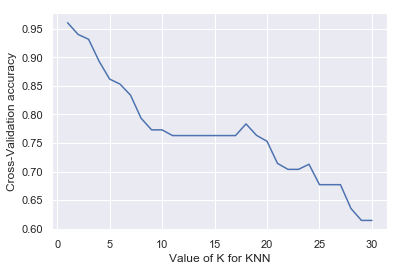

In [35]:
#plot value of k for KNN vs cross-validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation accuracy")

In [36]:
#compare best KNN model with decision tree classifier on iris dataset;4-fold cross validation w/ best knn model
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn,X,y,cv=4,scoring='accuracy').mean())    

0.967741935483871
0.9602380952380953


## Choosing the best n_neighbors value improves the model from 0.80 to 0.96 on both the test set accuracy as well as the cross-validation accuracy.

In [37]:
#utilize subset selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
print(fit.scores_)

[48.83380601 81.         37.41971889 60.         49.21473577 29.86897019
  5.43081027 37.06005598 18.         17.33875    17.58990385 62.55380201
 81.17062123 16.88043902  4.19252057 20.97600631]


## The highest scored features are: feathers, legs, fins, milk, hair, eggs and toothed.  Compare accuracy scores utilizing these features.

In [38]:
#compare test and cross validation accuracy on highest scoring features
x1_cols = ['hair', 'feathers', 'eggs', 'milk','toothed','fins', 'legs']
X1 = df[x1_cols].as_matrix()
knn = KNeighborsClassifier(n_neighbors=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.3,random_state=42)
knn.fit(X1_train,y1_train)
y1_pred = knn.predict(X1_test)
print(metrics.accuracy_score(y1_test, y1_pred))
knn = KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn,X1,y,cv=4,scoring='accuracy').mean())    

0.9354838709677419
0.9022023809523809


## Choosing only the top seven highest scored features did not improve the model.